In [2]:
import numpy as np
%run Karate_data_import.ipynb
import sys
sys.path.append('../') # Change path
from Functions import * # Import Gradient_function

In [15]:
mu = np.zeros(2) # Define mean (mu) as a zero vector
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]]) # Define covariance matrix
num_samples = 34  # Number of samples you want to generate

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

In [16]:
# Stopping after n iterations
n = 10 # Number of iterations
MLL = np.zeros(n) # Define the MLL
grad_sum = np.zeros(n) # Define the gradient sum
for k in range(n):
    for i in range(1,num_samples+1): # Run over number of num_samples
        for j in range(2): # Run over dimension
            grad_sum[k] += Gradient_function(i,j,Y,points)**2
            points[i][j] += 0.1*Gradient_function(i,j,Y,points) # Use Gradient_function and take step=0.1*grad
            
    MLL[k] = Loss_function(points,Y) # Calcualte the probability using Loss_function

/Users/signeolsen/opt/anaconda3/envs/bachelor/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/signeolsen/opt/anaconda3/envs/bachelor/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/Users/signeolsen/Desktop/Latent_distance_models/Karate dataset/../Functions.py:33: RuntimeWarning: invalid value encountered in scalar divide
  gradient += numerator / denominator # Calculate the fraction and plus all connection there is with point_number together


In [6]:
# Adding stopping criteria
prev_grad = 200 
grad = 0
k = 0
n = 100
MLL = np.zeros(n) # Define the MLL
grad_sum = np.zeros(n) # Define the gradient sum

while abs(prev_grad - grad) > 0.1: # stopping criteria
    prev_grad = grad
    for i in range(1,num_samples+1): # Run over number of num_samples
        for j in range(2): # Run over dimension
            grad_sum[k] += Gradient_function(i,j,Y,points)**2
            points[i][j] += 0.1*Gradient_function(i,j,Y,points) # Use Gradient_function and take step=0.1*grad
    grad = grad_sum[k]
    MLL[k] = Loss_function(points,Y) # Calcualte the probability using Loss_function
    print(k)
    k += 1

0


In [9]:
MLL

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

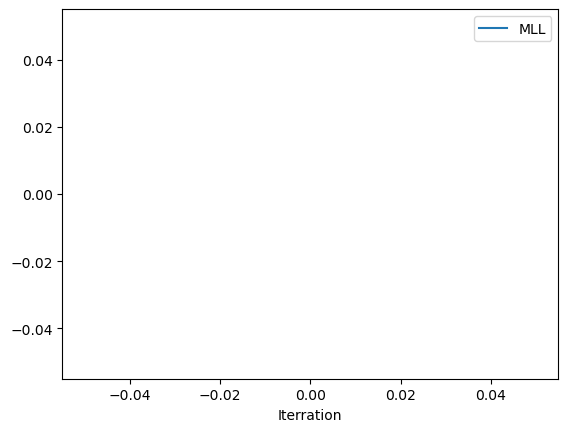

In [8]:
plt.plot(MLL,label='MLL')
#plt.plot(grad_sum1[0:k], label='Gradient sum')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()